Dataset Overview:
  EmployeeID       Unit Supervisor  JobSat1  JobSat2  JobSat3  TurnInt1  \
0     EID294  Marketing     EID373        3        3        3         3   
1     EID295  Marketing     EID373        2        3        2         3   
2     EID296  Marketing     EID373        2        2        3         3   
3     EID301  Marketing     EID367        2        2        3         4   
4     EID306  Marketing     EID367        2        2        2         4   

   TurnInt2  TurnInt3  Engage1  Engage2  Engage3  Engage4  Engage5  \
0         3         3        2        1        2        2        3   
1         4         2        2        1        3        3        3   
2         3         3        1        1        2        1        2   
3         4         4        3        2        3        2        2   
4         4         4        3        2        3        4        3   

   ExpIncivil1  ExpIncivil2  ExpIncivil3  ExpIncivil4  ExpIncivil5  
0            2            2            3 

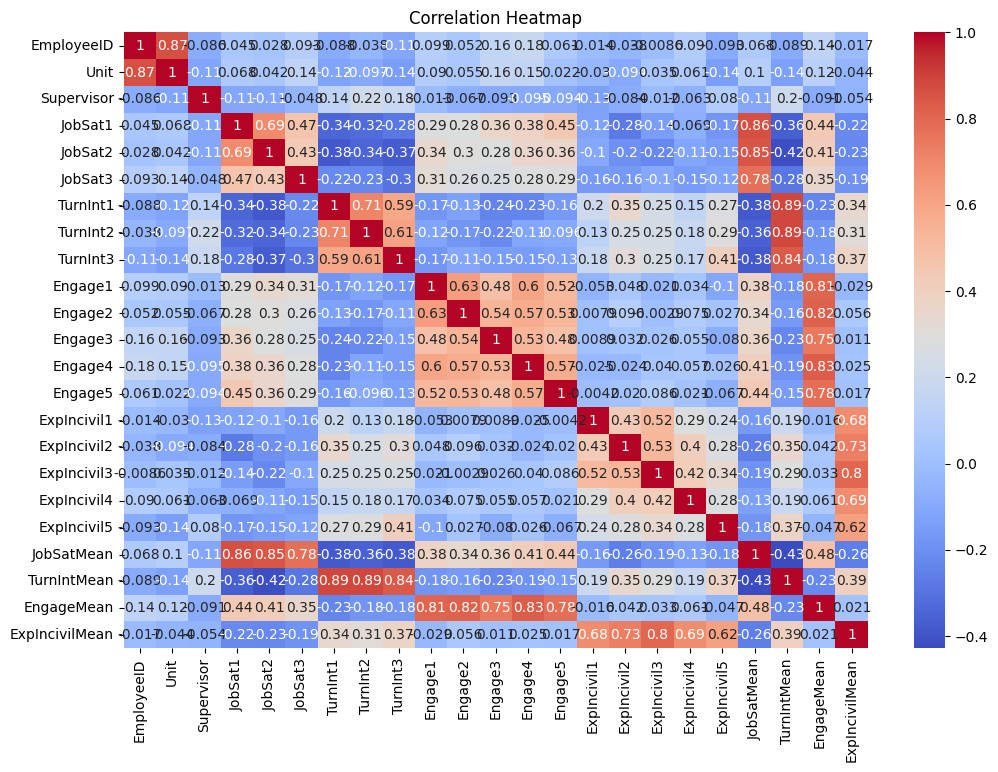

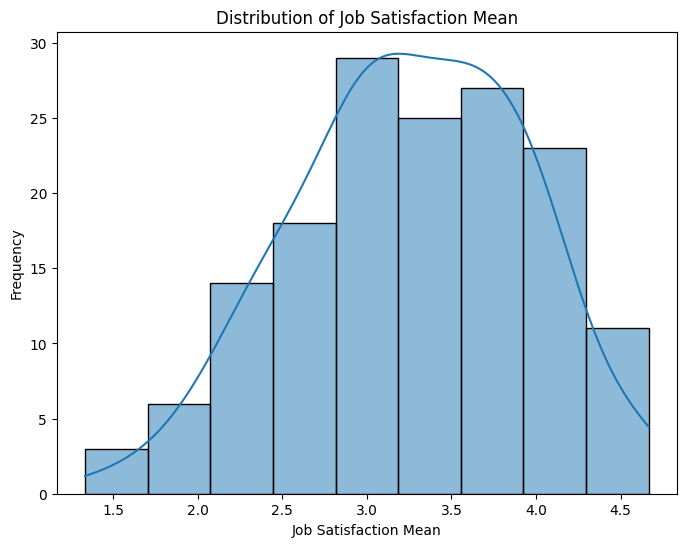

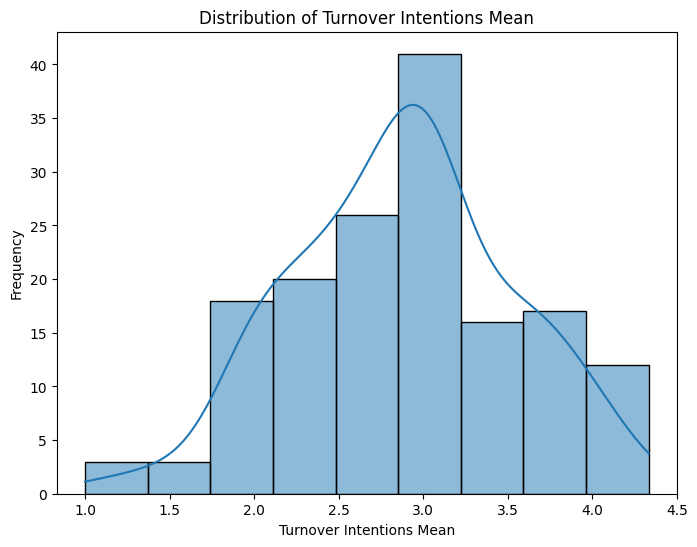

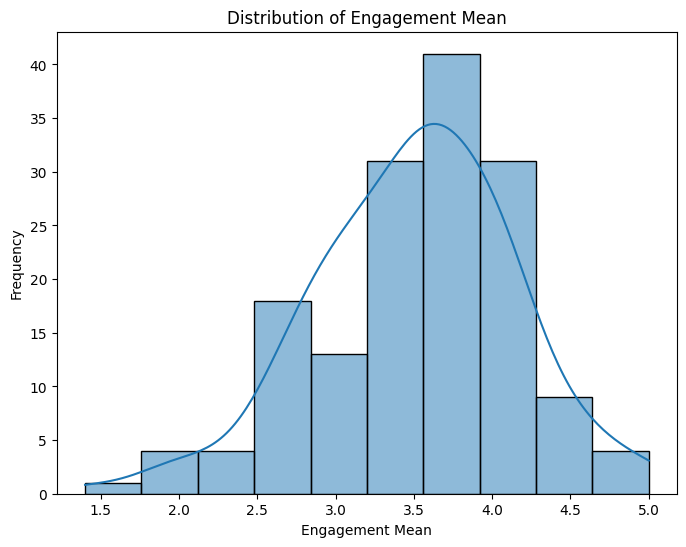

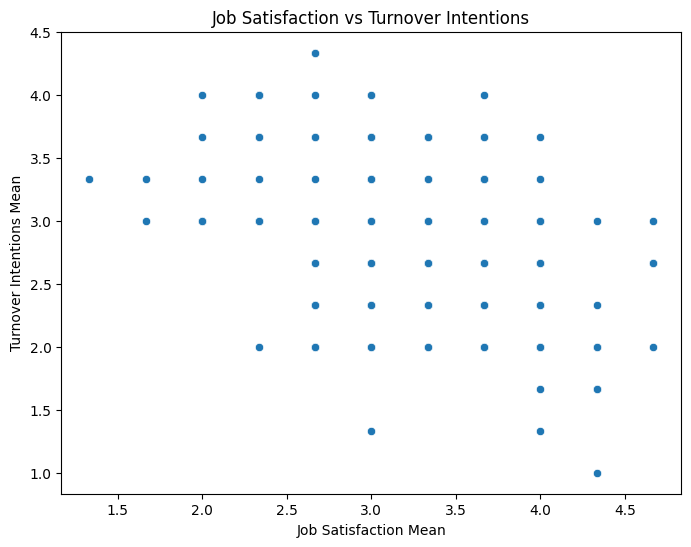

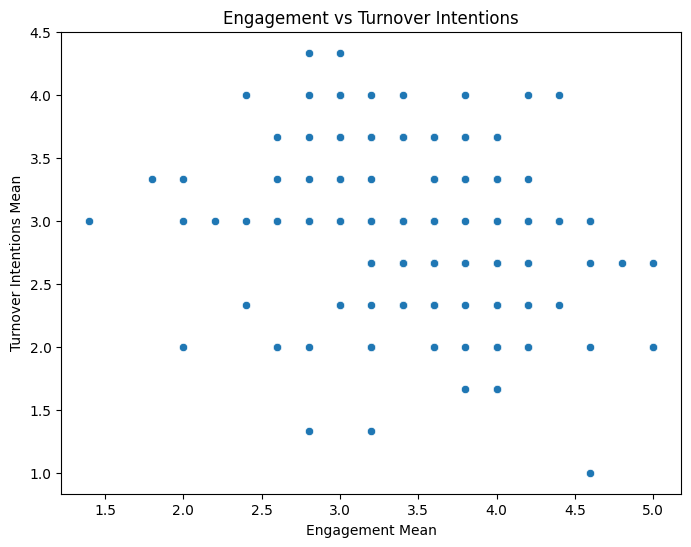

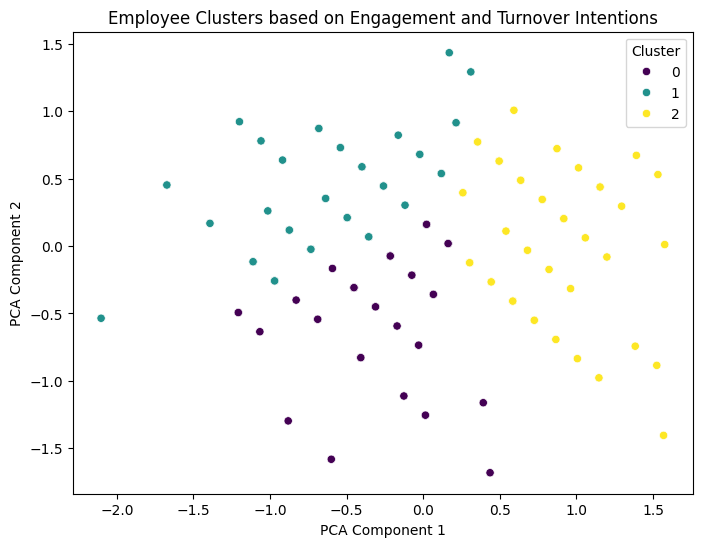

Feature Importances:
                importance
EngageMean        0.370763
ExpIncivilMean    0.356032
JobSatMean        0.273204


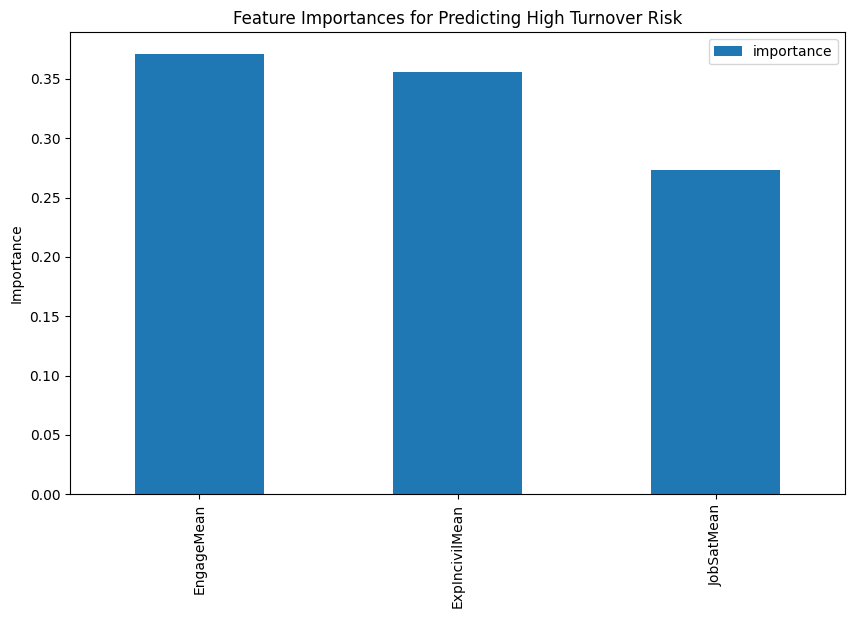

Training Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        79
           1       1.00      0.90      0.95        30

    accuracy                           0.97       109
   macro avg       0.98      0.95      0.96       109
weighted avg       0.97      0.97      0.97       109

Training Dataset Confusion Matrix:
[[79  0]
 [ 3 27]]

Testing Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        32
           1       0.40      0.27      0.32        15

    accuracy                           0.64        47
   macro avg       0.55      0.54      0.54        47
weighted avg       0.61      0.64      0.62        47

Testing Dataset Confusion Matrix:
[[26  6]
 [11  4]]


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load the Dataset
df = pd.read_csv('EmployeeSurveyData.csv')

# Step 3: Explore the Dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 4: Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


# Step 5: Feature Engineering
# Encode categorical variables
le = LabelEncoder()
df['Unit'] = le.fit_transform(df['Unit'])
df['Supervisor'] = le.fit_transform(df['Supervisor'])
df['EmployeeID'] = le.fit_transform(df['EmployeeID'])

# Calculate mean scores for Job Satisfaction, Turnover Intentions, and Engagement
df['JobSatMean'] = df[['JobSat1', 'JobSat2', 'JobSat3']].mean(axis=1)
df['TurnIntMean'] = df[['TurnInt1', 'TurnInt2', 'TurnInt3']].mean(axis=1)
df['EngageMean'] = df[['Engage1', 'Engage2', 'Engage3', 'Engage4', 'Engage5']].mean(axis=1)
df['ExpIncivilMean'] = df[['ExpIncivil1', 'ExpIncivil2', 'ExpIncivil3', 'ExpIncivil4', 'ExpIncivil5']].mean(axis=1)

# Step 6: Exploratory Data Analysis (EDA)
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Job Satisfaction Mean
plt.figure(figsize=(8, 6))
sns.histplot(df['JobSatMean'], kde=True)
plt.title('Distribution of Job Satisfaction Mean')
plt.xlabel('Job Satisfaction Mean')
plt.ylabel('Frequency')
plt.show()

# Distribution of Turnover Intentions Mean
plt.figure(figsize=(8, 6))
sns.histplot(df['TurnIntMean'], kde=True)
plt.title('Distribution of Turnover Intentions Mean')
plt.xlabel('Turnover Intentions Mean')
plt.ylabel('Frequency')
plt.show()

# Distribution of Engagement Mean
plt.figure(figsize=(8, 6))
sns.histplot(df['EngageMean'], kde=True)
plt.title('Distribution of Engagement Mean')
plt.xlabel('Engagement Mean')
plt.ylabel('Frequency')
plt.show()

# Step 7: Actionable Insights and Visualization
# Relationship between Job Satisfaction and Turnover Intentions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='JobSatMean', y='TurnIntMean', data=df)
plt.title('Job Satisfaction vs Turnover Intentions')
plt.xlabel('Job Satisfaction Mean')
plt.ylabel('Turnover Intentions Mean')
plt.show()

# Relationship between Engagement and Turnover Intentions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='EngageMean', y='TurnIntMean', data=df)
plt.title('Engagement vs Turnover Intentions')
plt.xlabel('Engagement Mean')
plt.ylabel('Turnover Intentions Mean')
plt.show()

# Step 8: Advanced Insights using Machine Learning
# K-Means Clustering on Engagement and Turnover Intentions
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['EngageMean', 'TurnIntMean']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Employee Clusters based on Engagement and Turnover Intentions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Feature Importance Analysis using Random Forest
X = df[['JobSatMean', 'EngageMean', 'ExpIncivilMean']]
y = (df['TurnIntMean'] > df['TurnIntMean'].median()).astype(int)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances for Predicting High Turnover Risk')
plt.ylabel('Importance')
plt.show()

# Predictions for training and testing datasets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Classification Report and Confusion Matrix for Training Dataset
print("Training Dataset Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Training Dataset Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Classification Report and Confusion Matrix for Testing Dataset
print("\nTesting Dataset Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Testing Dataset Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


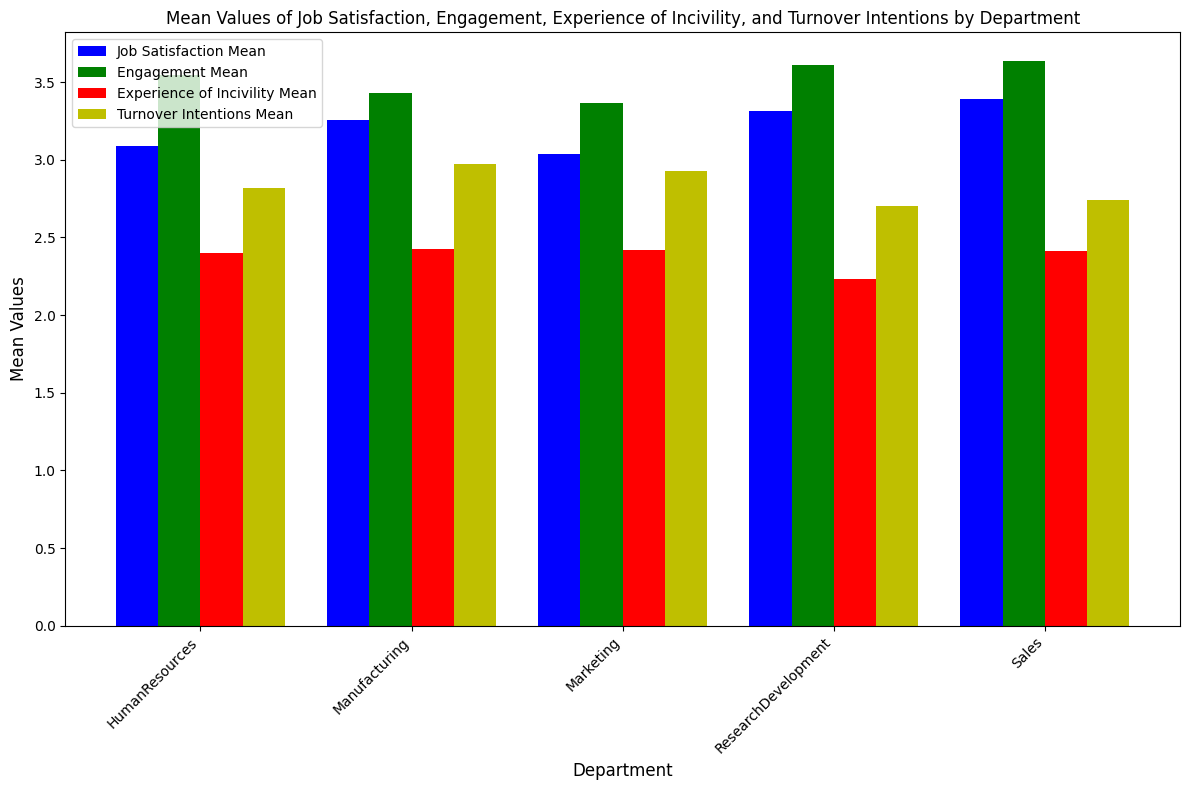

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Step 2: Load the Dataset
df = pd.read_csv('EmployeeSurveyData.csv')

# Calculate mean scores for Job Satisfaction, Turnover Intentions, and Engagement
df['JobSatMean'] = df[['JobSat1', 'JobSat2', 'JobSat3']].mean(axis=1)
df['TurnIntMean'] = df[['TurnInt1', 'TurnInt2', 'TurnInt3']].mean(axis=1)
df['EngageMean'] = df[['Engage1', 'Engage2', 'Engage3', 'Engage4', 'Engage5']].mean(axis=1)
df['ExpIncivilMean'] = df[['ExpIncivil1', 'ExpIncivil2', 'ExpIncivil3', 'ExpIncivil4', 'ExpIncivil5']].mean(axis=1)


# Calculate mean values for each department, keeping original 'Unit' names
department_means = df.groupby('Unit')[['JobSatMean', 'EngageMean', 'ExpIncivilMean', 'TurnIntMean']].mean().reset_index()

# Plot mean values for each department
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(department_means))

plt.bar(index, department_means['JobSatMean'], bar_width, label='Job Satisfaction Mean', color='b')
plt.bar(index + bar_width, department_means['EngageMean'], bar_width, label='Engagement Mean', color='g')
plt.bar(index + 2 * bar_width, department_means['ExpIncivilMean'], bar_width, label='Experience of Incivility Mean', color='r')
plt.bar(index + 3 * bar_width, department_means['TurnIntMean'], bar_width, label='Turnover Intentions Mean', color='y')

plt.xlabel('Department', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)
plt.title('Mean Values of Job Satisfaction, Engagement, Experience of Incivility, and Turnover Intentions by Department')

# Update x-axis ticks to display department names from 'department_means' DataFrame
plt.xticks(index + 1.5 * bar_width, department_means['Unit'], rotation=45, ha='right')  # ha='right' for better alignment
plt.legend()
plt.tight_layout()

plt.show()

In [26]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('EmployeeSurveyData.csv')


# Calculate mean scores for Job Satisfaction, Turnover Intentions, and Engagement
df['JobSatMean'] = df[['JobSat1', 'JobSat2', 'JobSat3']].mean(axis=1)
df['TurnIntMean'] = df[['TurnInt1', 'TurnInt2', 'TurnInt3']].mean(axis=1)
df['EngageMean'] = df[['Engage1', 'Engage2', 'Engage3', 'Engage4', 'Engage5']].mean(axis=1)
df['ExpIncivilMean'] = df[['ExpIncivil1', 'ExpIncivil2', 'ExpIncivil3', 'ExpIncivil4', 'ExpIncivil5']].mean(axis=1)

# Assuming df is your existing dataframe

# Step 1: Calculate Attrition Score
# We'll create a simple scoring function based on the features
# You can adjust the weight of each feature based on your domain knowledge

df['AttritionScore'] = (df['JobSatMean'] * 0.4) + (df['EngageMean'] * 0.3) - (df['ExpIncivilMean'] * 0.2) - (df['TurnIntMean'] * 0.1)

# Step 2: Classify employees based on the attrition score
def classify_attrition(score):
    if score >= 2.5:
        return 'Highly Satisfied'
    elif 2 <= score < 2.5:
        return 'Moderately Satisfied'
    elif 1.5 <= score < 2:
        return 'Dissatisfied'
    else:
        return 'At-Risk'

# Apply the classification function
df['AttritionClassification'] = df['AttritionScore'].apply(classify_attrition)

# Step 3: Create final dataframe with EmployeeID, Department, and Classification
result_df = df[['EmployeeID', 'Unit', 'AttritionClassification', 'AttritionScore']]

# Step 4: Save the result in a CSV file
result_df.to_csv('Employee_Attrition_Prediction.csv', index=False)

# Display the result (optional)
print(result_df.head())



  EmployeeID       Unit AttritionClassification  AttritionScore
0     EID294  Marketing                 At-Risk        1.060000
1     EID295  Marketing                 At-Risk        0.993333
2     EID296  Marketing                 At-Risk        0.693333
3     EID301  Marketing                 At-Risk        0.613333
4     EID306  Marketing                 At-Risk        0.740000


In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('EmployeeSurveyData.csv')

# Calculate mean scores for Job Satisfaction, Turnover Intentions, and Engagement
df['JobSatMean'] = df[['JobSat1', 'JobSat2', 'JobSat3']].mean(axis=1)
df['TurnIntMean'] = df[['TurnInt1', 'TurnInt2', 'TurnInt3']].mean(axis=1)
df['EngageMean'] = df[['Engage1', 'Engage2', 'Engage3', 'Engage4', 'Engage5']].mean(axis=1)
df['ExpIncivilMean'] = df[['ExpIncivil1', 'ExpIncivil2', 'ExpIncivil3', 'ExpIncivil4', 'ExpIncivil5']].mean(axis=1)

# Calculate average scores for each supervisor based on the employees they supervise
supervisor_performance = df.groupby('Supervisor')[['JobSatMean', 'EngageMean', 'ExpIncivilMean', 'TurnIntMean']].mean()

# Create a new column to calculate the overall performance score (average of JobSatMean, EngageMean, ExpIncivilMean)
supervisor_performance['PerformanceScore'] = supervisor_performance[['JobSatMean', 'EngageMean', 'ExpIncivilMean']].mean(axis=1)

# To include the turnover intentions, we can add a correlation with the 'TurnIntMean'
# A low average TurnIntMean indicates better performance (less turnover intent)
supervisor_performance['TurnoverIntentions'] = supervisor_performance['TurnIntMean']

# Sort supervisors by performance score
supervisor_performance_sorted = supervisor_performance.sort_values(by='PerformanceScore', ascending=False)

# Save the supervisor performance data to a CSV file
supervisor_performance_sorted.to_csv('SupervisorPerformance.csv')

# Display the results
print(supervisor_performance_sorted)


            JobSatMean  EngageMean  ExpIncivilMean  TurnIntMean  \
Supervisor                                                        
EID369        3.666667    4.600000        2.800000     3.000000   
EID376        3.636364    3.854545        2.381818     2.787879   
EID381        3.666667    4.000000        2.200000     3.333333   
EID374        3.666667    3.800000        2.333333     2.333333   
EID368        3.392157    3.588235        2.517647     2.823529   
EID375        3.444444    3.600000        2.366667     3.055556   
EID367        3.133333    3.540000        2.580000     3.033333   
EID371        3.666667    3.314286        2.257143     2.190476   
EID372        3.270270    3.556757        2.340541     2.756757   
EID377        3.222222    3.533333        2.400000     2.555556   
EID370        3.200000    3.460000        2.400000     2.800000   
EID380        3.105263    3.315789        2.463158     3.000000   
EID379        2.000000    4.400000        2.400000     3.00000